In [1]:
import pandas as pd

In [2]:
data=pd.read_csv("titanic.csv")

In [3]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
data.drop(columns=["PassengerId","Name","SibSp","Parch","Ticket","Cabin","Embarked"],inplace=True)

In [5]:
data.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [6]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [16]:
data["Sex"]=le.fit_transform(data[["Sex"]])
data.head()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Survived,Pclass,Sex,Age,Fare
0,0,3,1,22.0,7.2500
1,1,1,0,38.0,71.2833
2,1,3,0,26.0,7.9250
3,1,1,0,35.0,53.1000
4,0,3,1,35.0,8.0500


In [18]:
data.count()

Survived    891
Pclass      891
Sex         891
Age         714
Fare        891
dtype: int64

In [23]:
data.Age=data.Age.fillna(data.Age.median())
data.count()

Survived    891
Pclass      891
Sex         891
Age         891
Fare        891
dtype: int64

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x=data[["Pclass","Sex","Age","Fare"]]
y=data[["Survived"]]

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [27]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()

In [28]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [34]:
dtc.score(x_test,y_test)

0.770949720670391

In [44]:
dtc.predict([[3,1,22,7.25]])

array([0], dtype=int64)

In [59]:
import numpy as np
b=pd.Series([dtc.predict(x_test)])
a=pd.Series([x_test])


In [36]:
import matplotlib.pyplot as plt

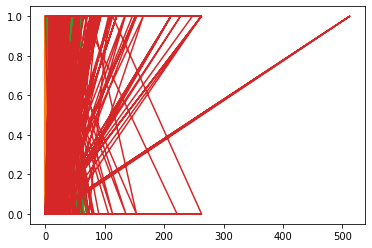

In [40]:
plt.plot(x_train,y_train)

In [43]:
plt.plot(x_test,dtc.predict([x_test]))

ValueError: cannot copy sequence with size 179 to array axis with dimension 4